In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assi_df_1=pd.read_excel('assigned_tech.xlsx')

In [3]:
assi_df_1.head()

,Unnamed: 0,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc,Zip_income
0,0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000,23933.540000
1,1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000,68711.216667
2,2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667,110329.465000
3,3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000,32925.410000
4,4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000,83225.340000


In [4]:
assi_df_1=assi_df_1.drop(['Unnamed: 0'],axis=1)

In [5]:
assi_df_1.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc', 'Zip_income'],
      dtype='object')

In [6]:
assi_df=assi_df_1[['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc']]

In [7]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667
3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000


<AxesSubplot:>

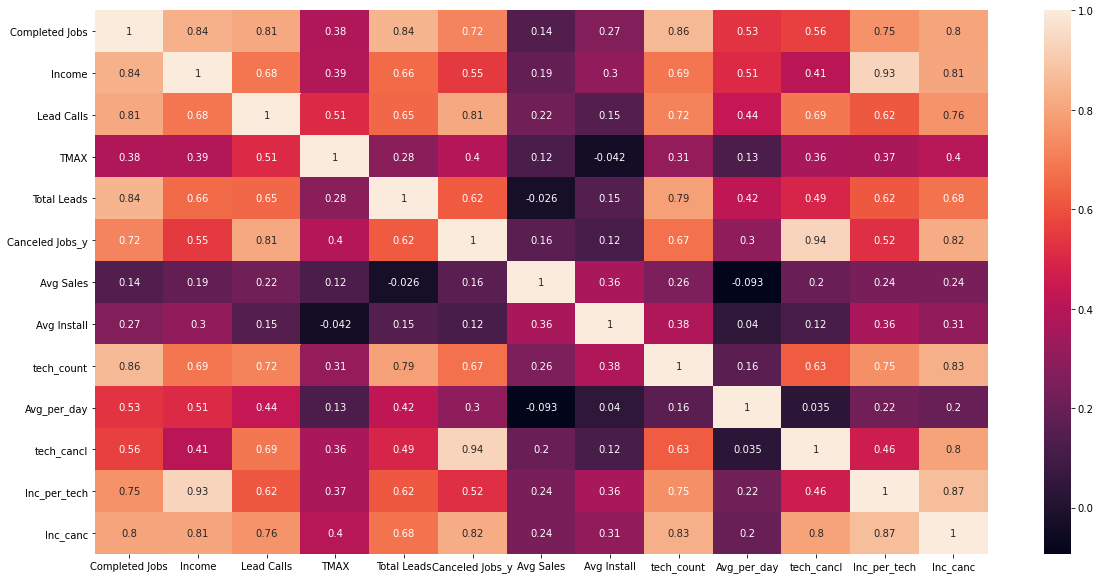

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(assi_df.corr(method='spearman'),annot=True)

In [9]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc'],
      dtype='object')

In [10]:
train=assi_df[0:300]
test=assi_df[300:]

In [11]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor


In [14]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [15]:
# fit the X_train and y_train values to the model
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
# training data set score
random_forest_reg.score(X_train,y_train)

0.9937435312751948

In [17]:
# test data set score
random_forest_reg.score(X_test,y_test)

0.985520064034201

In [18]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_forest_reg,X,y,cv=5)

In [19]:
score.mean()

0.9608198065770381

In [20]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [21]:
y_

300    121551.86
301     43465.15
302       176.00
303    114534.21
304    127412.10
305    127412.10
306     73107.94
307    100335.70
308     82920.44
309     36992.00
310       326.00
311     86287.17
312     79380.38
313    104509.01
314     96828.96
315    108327.11
316     99625.26
317     76878.35
318     69089.17
319    128210.29
320    177410.42
321     68424.71
322    130406.40
323     41651.85
324       102.95
325    121328.92
326     94156.55
327     93428.49
328     73106.96
329     62484.03
330     50088.00
331     45289.92
332     95437.44
333    100674.86
334     55735.08
335     86421.80
336     86421.80
337     41343.95
338     15788.00
339    128985.55
340     93402.16
341    176747.02
342     32502.40
343     55111.85
344    133042.85
345     88538.89
346     66133.39
347     67090.81
348    126604.24
349     33965.63
350       179.40
351    159679.48
352     41631.57
353    100081.20
354     53637.35
355     28791.98
356     56282.45
357     72449.57
358    125057.

In [22]:
random_forest_reg.score(X_,y_)

0.9457548402243268

In [23]:
y_pred= random_forest_reg.predict(X_)

In [24]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

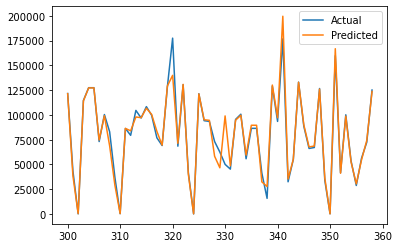

In [26]:
comp.plot()

In [27]:
from sklearn import metrics

In [28]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 9719.939300618704
MAE: 4549.726786440686


# Hyper Parameter tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.0s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   3.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   3.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.7s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   4.3s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   5.0s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   4.6s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   4.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   4.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   3.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   3.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   4.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   3.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 11.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [33]:
rf_random.best_score_


0.8953391947107551

In [35]:
tuned_model=rf = RandomForestRegressor(n_estimators=1800,min_samples_split=2,min_samples_leaf= 2,max_features='auto',max_depth=80,bootstrap=True)


In [36]:
tuned_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=2, n_estimators=1800)

In [37]:
tuned_model.score(X_train,y_train)

0.9898598438151969

In [38]:
tuned_model.score(X_test,y_test)

0.9843072550963444

In [39]:
tuned_model.score(X_,y_)

0.943321353080491

In [40]:
y_pred_1=tuned_model.predict(X_)

In [41]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

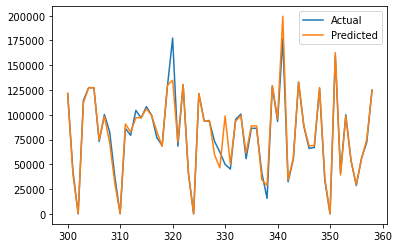

In [42]:
comp_2.plot()

In [43]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 9935.570135646842
MAE: 4566.29850602381
